In [1]:
# !pip uninstall --yes qiskit qiskit-terra

In [2]:
# !pip install qiskit

In [3]:
# !pip install -U qiskit-aer

In [4]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit_aer import Aer
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

## Plot Distributional Differences

Measurement Counts: {'10010001': 3, '11110111': 2, '11010010': 2, '10000011': 4, '10101100': 2, '00000111': 3, '10110010': 3, '00100111': 2, '11011010': 3, '10101000': 6, '11101011': 1, '10001010': 3, '11101100': 2, '00001011': 2, '10010010': 2, '00110110': 3, '11100111': 2, '11000101': 3, '10000101': 4, '01000001': 1, '01111011': 4, '00101100': 2, '00001000': 4, '10011011': 1, '11011011': 3, '11110101': 4, '01110000': 7, '11100011': 7, '11111000': 4, '00100011': 5, '01101000': 3, '00000011': 7, '01001100': 6, '00100101': 3, '00100110': 3, '01011100': 2, '01101010': 4, '10001100': 6, '10110001': 4, '11101101': 4, '10100100': 3, '00100100': 6, '00111010': 6, '01011110': 3, '00010100': 6, '10001110': 3, '01011111': 6, '00010110': 3, '11110110': 6, '00000010': 4, '00011100': 5, '00011110': 8, '00101010': 1, '11011101': 4, '10111011': 1, '11111011': 5, '10000100': 4, '11100110': 3, '01010100': 2, '01001001': 4, '11100001': 1, '01100010': 2, '11101110': 7, '01100110': 4, '10011110': 2, '110

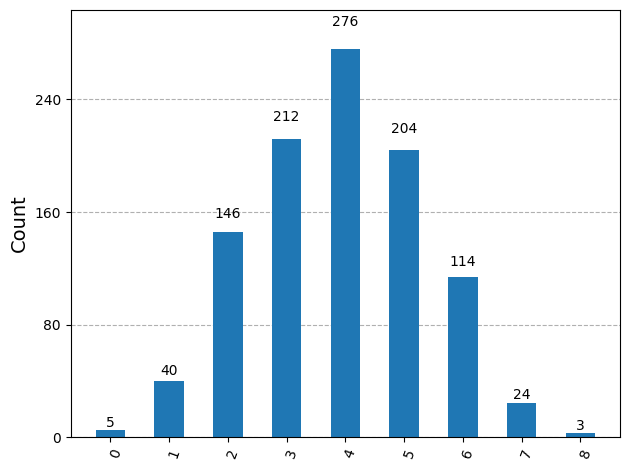

In [5]:
# set number of levels and pegs
n_levels_and_pegs = 8
theta = np.pi / 3 # this should skew our distribution right
# we need the ClassicalRegister for our swap
qr = QuantumRegister(n_levels_and_pegs, 'q')
cr = ClassicalRegister(n_levels_and_pegs, 'c')
qc3 = QuantumCircuit(qr, cr)

# We use the usual hadamard to simulate our pegs, but this time,
# we use a loop to initialize the levels and pegs
# for a simple n-level board, Hadamard gates suffice to generate the binomial distribution.
for i in range(n_levels_and_pegs):
## we use Ry(\theta) instead of Hadamard and this should give us a distribution that skews right.
    qc3.h(qr[i])

# We take a measurement. 
qc3.measure(qr, cr)

## we measure after to get our distribution
# here we are counting in the bitstring the number of 1s
# this gives us a pretty good count of our distribution ie. binomial
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc3, simulator)

# Execute the circuit and get the results
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the measurement outcomes
counts = result.get_counts(qc3)

print("Measurement Counts:", counts)
bin_counts = {}
for bitstring, count in counts.items():
    num_ones = bitstring.count('1')
    bin_counts[num_ones] = bin_counts.get(num_ones, 0) + count
bin_counts1 = bin_counts
counts4 = counts
plot_histogram(bin_counts)

Measurement Counts: {'11100100': 1, '10011100': 1, '00111100': 1, '00111010': 1, '10001111': 3, '11110001': 2, '01010110': 2, '10010111': 1, '11001000': 1, '00111011': 2, '01100010': 1, '11100010': 1, '10111000': 1, '00111000': 1, '10101010': 1, '11111000': 1, '01001011': 2, '00110100': 1, '01011101': 3, '00011101': 2, '00001011': 1, '01011010': 1, '01000010': 1, '00110111': 4, '01111101': 3, '00111101': 1, '11011010': 3, '11000111': 2, '01110000': 1, '01110111': 10, '10110110': 3, '01110110': 3, '11000110': 4, '11001100': 3, '10010101': 4, '01010011': 3, '10010011': 1, '10001101': 2, '11111100': 10, '01010100': 1, '10010110': 1, '01010111': 4, '10100111': 4, '01011011': 4, '00100101': 1, '01101100': 1, '01110101': 3, '10011010': 1, '10101110': 4, '01101101': 3, '10000111': 2, '11001011': 7, '11011111': 33, '10011011': 3, '11010111': 8, '01011100': 1, '10101100': 2, '10110111': 15, '10000100': 1, '10011110': 4, '01110010': 3, '01110001': 2, '01111011': 9, '01100111': 5, '11101011': 15,

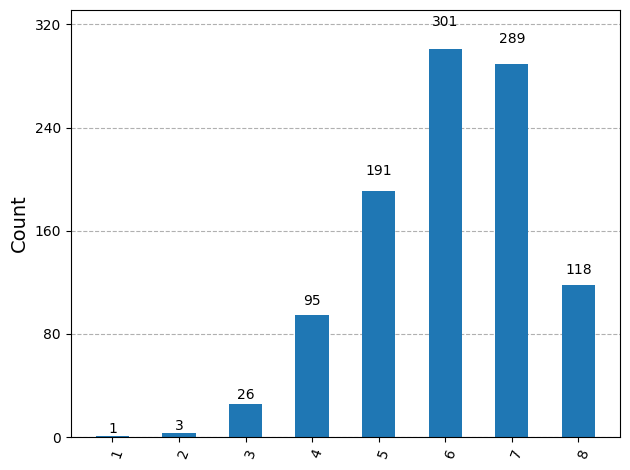

In [6]:
# set number of levels and pegs
n_levels_and_pegs = 8
theta = np.pi / 3 # this should skew our distribution right
# we need the ClassicalRegister for our swap
qr = QuantumRegister(n_levels_and_pegs, 'q')
cr = ClassicalRegister(n_levels_and_pegs, 'c')
qc3 = QuantumCircuit(qr, cr)

# We use the usual hadamard to simulate our pegs, but this time,
# we use a loop to initialize the levels and pegs
# for a simple n-level board, Hadamard gates suffice to generate the binomial distribution.
for i in range(n_levels_and_pegs):
## we use Ry(\theta) instead of Hadamard and this should give us a distribution that skews right.
    qc3.ry(2 * theta, i)

# We take a measurement. 
qc3.measure(qr, cr)

## we measure after to get our distribution
# here we are counting in the bitstring the number of 1s
# this gives us a pretty good count of our distribution ie. binomial
simulator = Aer.get_backend('qasm_simulator')

# Transpile the circuit for the simulator
compiled_circuit = transpile(qc3, simulator)

# Execute the circuit and get the results
job = simulator.run(compiled_circuit, shots=1024)
result = job.result()

# Get the measurement outcomes
counts = result.get_counts(qc3)

print("Measurement Counts:", counts)
bin_counts = {}
for bitstring, count in counts.items():
    num_ones = bitstring.count('1')
    bin_counts[num_ones] = bin_counts.get(num_ones, 0) + count
bin_counts2 = bin_counts
plot_histogram(bin_counts)

In [7]:
from qiskit.visualization import plot_histogram
import matplotlib

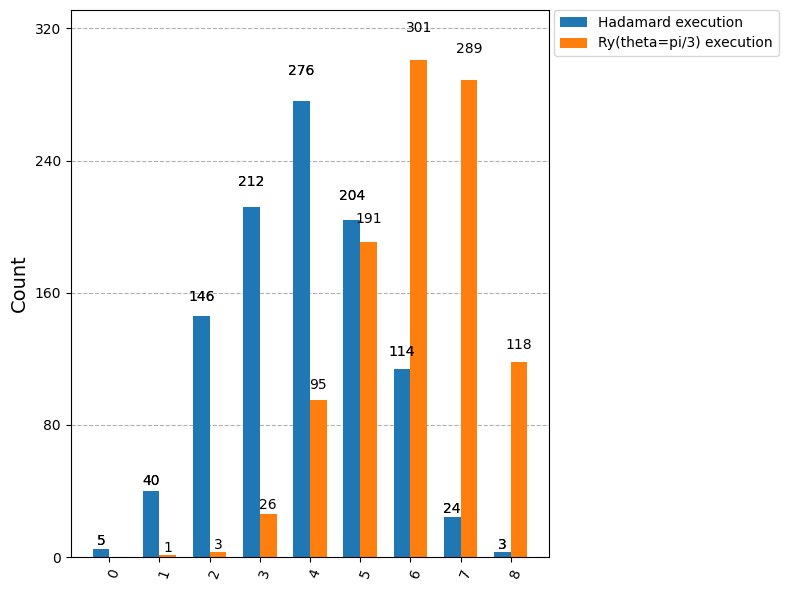

In [8]:
from qiskit.visualization import plot_histogram

legend = ['Hadamard execution', 'Ry(theta=pi/3) execution'] # Optional legend for clarity

# Plotting the histograms on top of each other
plot_histogram([bin_counts1, bin_counts2], legend=legend, figsize=(8, 6)) 
